In [18]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    return dict(count.most_common(ntags))

def Wordcloud(data , savename , maskname=''):
    
    if maskname == '':
        wc = WordCloud( font_path='./font/BMDOHYEON_ttf.ttf' , background_color='white', max_font_size=60, colormap='spring')
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='./font/BMDOHYEON_ttf.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='spring')
        
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file(savename + ".png")
    

def get_googleplay(url,filename):
   
    driver = webdriver.Chrome('chromedriver.exe')
    driver.implicitly_wait(1)
    driver.get(url)
    driver.maximize_window()
    time.sleep(3)


    for i in range(0,10):
        sheight = (driver.execute_script("return document.body.scrollHeight"))     #스크롤바의 시작지점
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")    #스크롤바를 화면 밑으로 내림
        time.sleep(2)
        lastheight = (driver.execute_script("return document.body.scrollHeight"))  #현재 스크롤바 위치 저장

        if sheight == lastheight:
            try:
                driver.find_element_by_class_name('CwaK9').click()
                time.sleep(2)
            except:
                print('더보기 없음')

    html = driver.page_source    
    soup = BeautifulSoup(html,'lxml')
    result = soup.find_all('span',{'jsname':'bN97Pc'})

    replydata = []
    for temp in result:
        hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
        rtext = hangul.sub(r' ',temp.text)
        replydata.append(rtext)
    
    rdata = pd.DataFrame(replydata)
    rdata.to_csv(filename+ ' 구글플레이 댓글.csv')

    rtext = ''
    for temp in replydata:
        rtext = rtext + temp

    resulttext = get_tags(rtext,100)
    Wordcloud(resulttext, filename+' 구글플레이 워드클라우드.png')

    

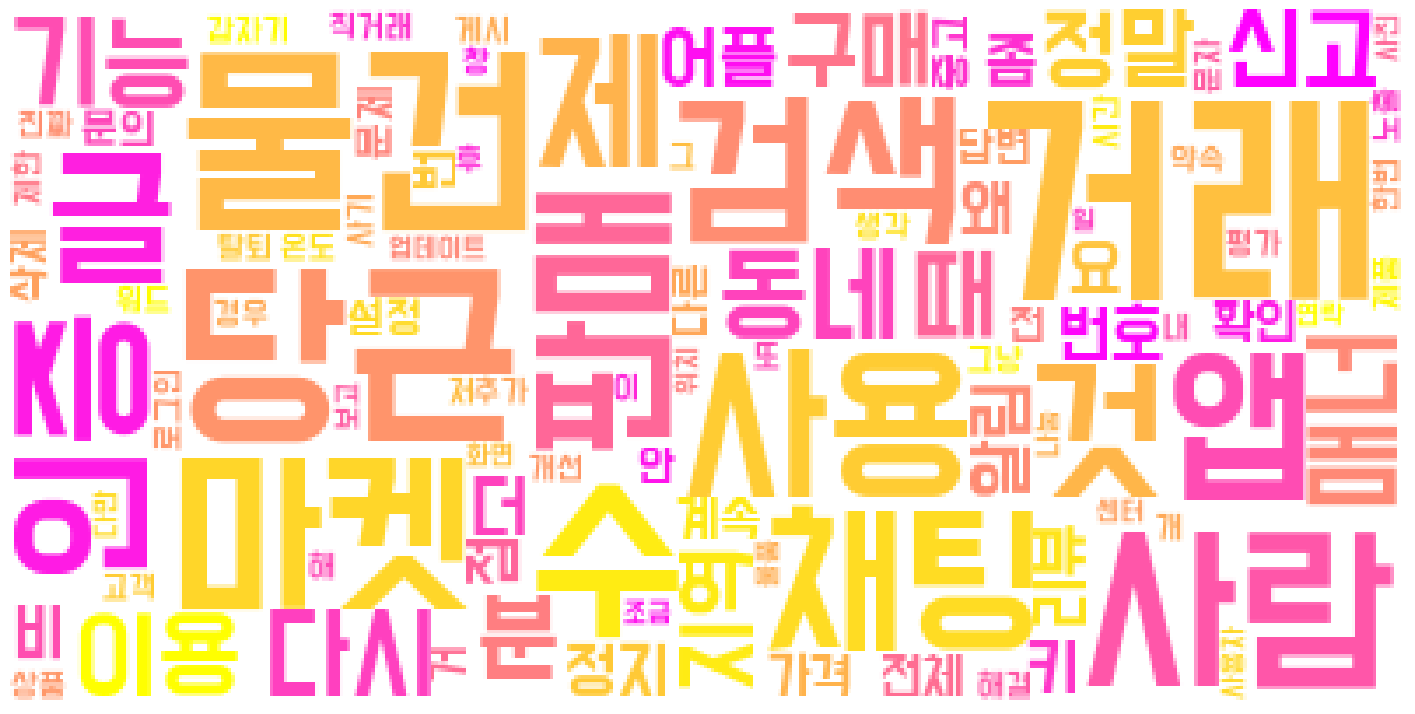

In [19]:
get_googleplay('https://play.google.com/store/apps/details?id=com.towneers.www&showAllReviews=true','당근마켓')